In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime 

df = pd.read_csv('/Users/ladipo/Desktop/Charter/charter_pricepred/data/data/data_generation.csv')
df.head()

ModuleNotFoundError: No module named 'pandas._libs.hashtable'

In [ ]:
df.iloc[:, [0, 1, 2, 3]]

,Charter Date,Vessel Type,Charter Price ($/day),Duration (days)
0,2021-07-06,LNG Carrier,26787,274
1,2023-05-10,LNG Carrier,25509,250
2,2023-02-15,LPG Carrier,27633,170
3,2022-09-01,LNG Carrier,30691,110
4,2023-01-17,Tanker,26336,341
...,...,...,...,...
2495,2023-03-12,Bulk Carrier,25973,57
2496,2023-02-27,Bulk Carrier,29432,444
2497,2023-07-06,Bulk Carrier,16066,144
2498,2021-09-18,Container Ship,32243,90


In [ ]:
df.isnull().sum()

Charter Date                   0
Vessel Type                    0
Charter Price ($/day)          0
Duration (days)                0
LNG Capacity (m)            2017
LPG Capacity (m)            1972
Cargo Capacity (DWT)        1489
Container Capacity (TEU)    2022
Size Category                  0
Cargo Type                     0
Vessel Length (m)              0
Vessel breadth (m)             0
Fuel Cost ($/liter)            0
Age_of_Vess                    0
dtype: int64

In [ ]:
#Made all values lower case and replaced space with underscore for smooth reading
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['charter_date', 'vessel_type', 'charter_price_($/day)',
       'duration_(days)', 'lng_capacity_(m)', 'lpg_capacity_(m)',
       'cargo_capacity_(dwt)', 'container_capacity_(teu)', 'size_category',
       'cargo_type', 'vessel_length_(m)', 'vessel_breadth_(m)',
       'fuel_cost_($/liter)', 'age_of_vess'],
      dtype='object')

In [ ]:
df['vessel_type'].value_counts()

vessel_type
LPG Carrier       528
Tanker            507
Bulk Carrier      504
LNG Carrier       483
Container Ship    478
Name: count, dtype: int64

In [ ]:
# Handling Nan by filling with 0. All columns useful so no dropping
df = df.fillna(0)
df.head()

,charter_date,vessel_type,charter_price_($/day),duration_(days),lng_capacity_(m),lpg_capacity_(m),cargo_capacity_(dwt),container_capacity_(teu),size_category,cargo_type,vessel_length_(m),vessel_breadth_(m),fuel_cost_($/liter),age_of_vess
0,2021-07-06,LNG Carrier,26787,274,148692.0,0.0,0.0,0.0,Typical LNG Carrier,Liquified Natural Gas,253,40,0.60,12
1,2023-05-10,LNG Carrier,25509,250,129915.0,0.0,0.0,0.0,Typical LNG Carrier,Liquified Natural Gas,208,46,0.69,8
2,2023-02-15,LPG Carrier,27633,170,0.0,74813.0,0.0,0.0,Typical LPG Carrier,Liquified Petroleum Gas,131,28,0.67,11
3,2022-09-01,LNG Carrier,30691,110,100046.0,0.0,0.0,0.0,Typical LNG Carrier,Liquified Natural Gas,267,48,0.78,9
4,2023-01-17,Tanker,26336,341,0.0,0.0,247867.0,0.0,ULCC,Refined Products,178,31,0.53,8


In [ ]:
df.dtypes

charter_date                 object
vessel_type                  object
charter_price_($/day)         int64
duration_(days)               int64
lng_capacity_(m)            float64
lpg_capacity_(m)            float64
cargo_capacity_(dwt)        float64
container_capacity_(teu)    float64
size_category                object
cargo_type                   object
vessel_length_(m)             int64
vessel_breadth_(m)            int64
fuel_cost_($/liter)         float64
age_of_vess                   int64
dtype: object

In [ ]:
df.describe()

,charter_price_($/day),duration_(days),lng_capacity_(m),lpg_capacity_(m),cargo_capacity_(dwt),container_capacity_(teu),vessel_length_(m),vessel_breadth_(m),fuel_cost_($/liter),age_of_vess
count,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,29952.869200,246.078000,24055.39440,8610.826800,66555.460000,1661.568400,211.856400,38.092800,0.651848,9.472000
std,11423.857466,115.765064,49560.73123,19331.900748,103911.559169,3697.638685,71.290038,12.446773,0.088761,5.134877
min,10017.000000,45.000000,0.00000,0.000000,0.000000,0.000000,70.000000,14.000000,0.500000,1.000000
25%,21351.250000,146.000000,0.00000,0.000000,0.000000,0.000000,156.000000,28.000000,0.570000,5.000000
50%,28534.500000,246.000000,0.00000,0.000000,0.000000,0.000000,213.000000,40.000000,0.650000,9.000000
75%,37853.250000,343.000000,0.00000,0.000000,114343.000000,0.000000,263.000000,47.000000,0.730000,14.000000
max,59900.000000,450.000000,149967.00000,79896.000000,399704.000000,13995.000000,400.000000,65.000000,0.800000,18.000000


In [ ]:
for col in df:
    print(df.duplicated().sum())
    print(df.shape)
    print(df.isnull().sum())

0
(2500, 14)
charter_date                0
vessel_type                 0
charter_price_($/day)       0
duration_(days)             0
lng_capacity_(m)            0
lpg_capacity_(m)            0
cargo_capacity_(dwt)        0
container_capacity_(teu)    0
size_category               0
cargo_type                  0
vessel_length_(m)           0
vessel_breadth_(m)          0
fuel_cost_($/liter)         0
age_of_vess                 0
dtype: int64
0
(2500, 14)
charter_date                0
vessel_type                 0
charter_price_($/day)       0
duration_(days)             0
lng_capacity_(m)            0
lpg_capacity_(m)            0
cargo_capacity_(dwt)        0
container_capacity_(teu)    0
size_category               0
cargo_type                  0
vessel_length_(m)           0
vessel_breadth_(m)          0
fuel_cost_($/liter)         0
age_of_vess                 0
dtype: int64
0
(2500, 14)
charter_date                0
vessel_type                 0
charter_price_($/day)       0
durat

In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Number of duplicates in column '{col}': {df[col].duplicated().sum()}")
    print(f"Shape of DataFrame: {df.shape}")
    print(f"Number of null values in column '{col}': {df[col].isnull().sum()}")
    print("-" * 40)


Column: charter_date
Number of duplicates in column 'charter_date': 1496
Shape of DataFrame: (2500, 14)
Number of null values in column 'charter_date': 0
----------------------------------------
Column: vessel_type
Number of duplicates in column 'vessel_type': 2495
Shape of DataFrame: (2500, 14)
Number of null values in column 'vessel_type': 0
----------------------------------------
Column: charter_price_($/day)
Number of duplicates in column 'charter_price_($/day)': 78
Shape of DataFrame: (2500, 14)
Number of null values in column 'charter_price_($/day)': 0
----------------------------------------
Column: duration_(days)
Number of duplicates in column 'duration_(days)': 2094
Shape of DataFrame: (2500, 14)
Number of null values in column 'duration_(days)': 0
----------------------------------------
Column: lng_capacity_(m)
Number of duplicates in column 'lng_capacity_(m)': 2022
Shape of DataFrame: (2500, 14)
Number of null values in column 'lng_capacity_(m)': 0
-----------------------

### Exploratory Data Analysis 

### Vessel Type, Category and Cargo Type

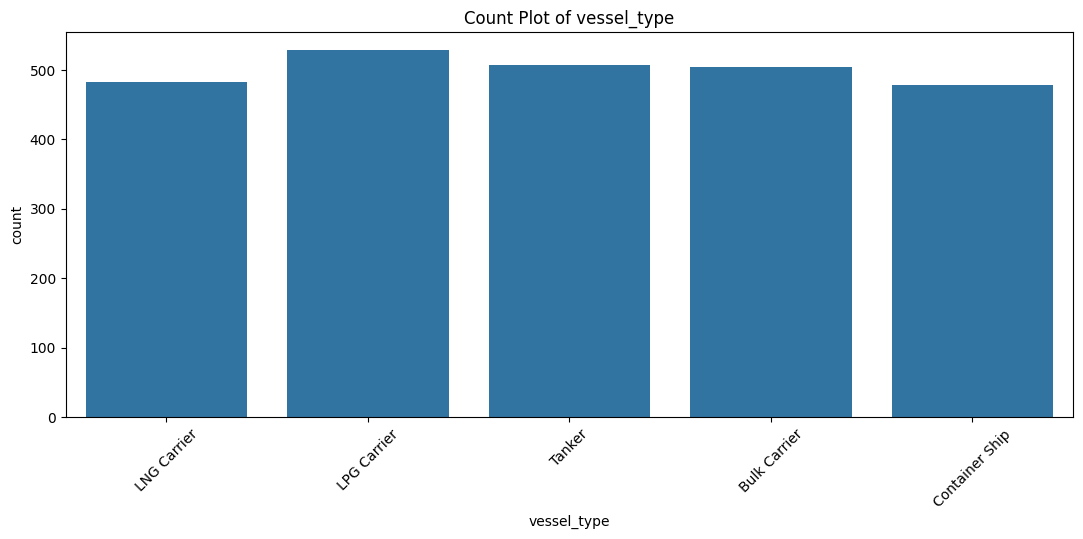

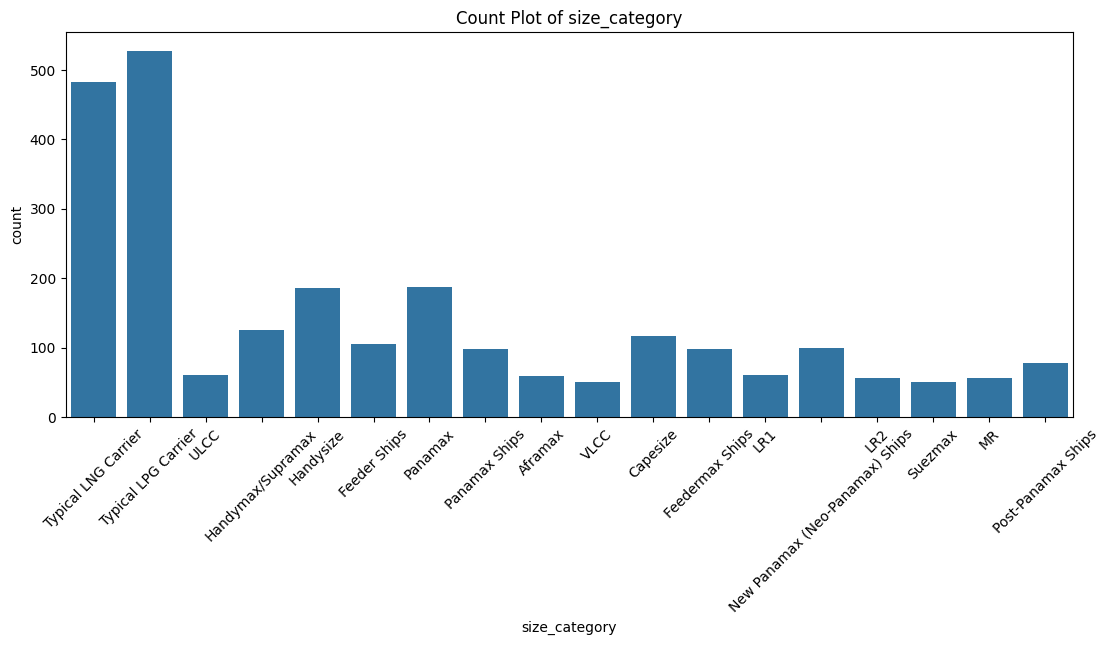

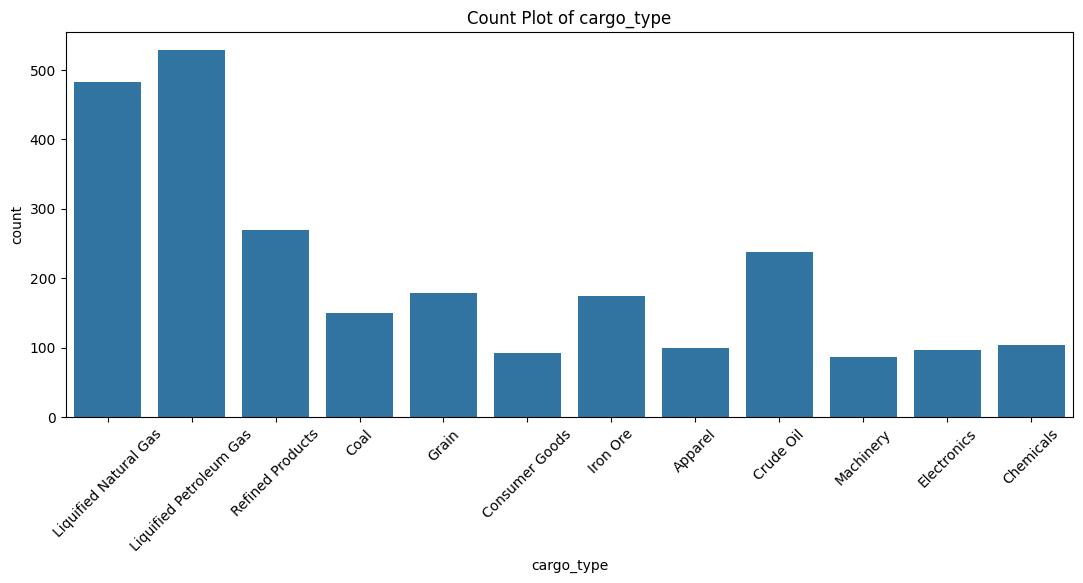

In [ ]:
cat_var = ['vessel_type', 'size_category', 'cargo_type']

for col in cat_var:
    plt.figure(figsize = (13, 5))
    sns.countplot(x = df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation = 45)
    plt.show()

In [ ]:
for col in ['vessel_type', 'size_category', 'cargo_type']:
    print(df.groupby(col)['charter_price_($/day)'].describe())

                count          mean           std      min       25%      50%  \
vessel_type                                                                     
Bulk Carrier    504.0  20388.162698   5945.949989  10048.0  15388.75  20232.5   
Container Ship  478.0  22360.974895   7250.348801  10017.0  16042.50  22274.0   
LNG Carrier     483.0  43066.954451   9901.804431  25005.0  34900.00  43769.0   
LPG Carrier     528.0  31562.465909   6696.363010  20137.0  26035.50  31581.0   
Tanker          507.0  32449.057199  10052.459750  15041.0  23341.00  32889.0   

                     75%      max  
vessel_type                        
Bulk Carrier    25940.00  29990.0  
Container Ship  28382.75  34956.0  
LNG Carrier     51474.00  59900.0  
LPG Carrier     37548.25  42832.0  
Tanker          40831.00  49859.0  
                                 count          mean           std      min  \
size_category                                                                 
Aframax               

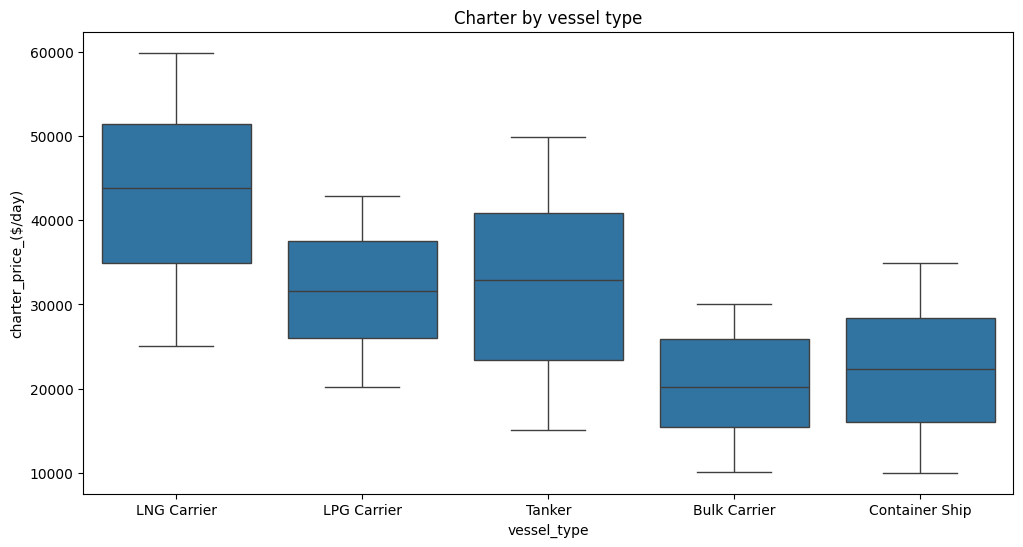

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'vessel_type' , y = 'charter_price_($/day)')
plt.title('Charter by vessel type')
plt.show()

### Date Analysis and Time Series plot

In [ ]:
#Sorting date out 

df['charter_date'] = pd.to_datetime(df['charter_date'])
df['year'] = df['charter_date'].dt.year
df['month'] = df['charter_date'].dt.month
df['day'] = df['charter_date'].dt.day


In [ ]:
df['vessel_type'].unique()

array(['LNG Carrier', 'LPG Carrier', 'Tanker', 'Bulk Carrier',
       'Container Ship'], dtype=object)

In [ ]:
df.head()

,charter_date,vessel_type,charter_price_($/day),duration_(days),lng_capacity_(m),lpg_capacity_(m),cargo_capacity_(dwt),container_capacity_(teu),size_category,cargo_type,vessel_length_(m),vessel_breadth_(m),fuel_cost_($/liter),age_of_vess,year,month,day
0,2021-07-06,LNG Carrier,26787,274,148692.0,0.0,0.0,0.0,Typical LNG Carrier,Liquified Natural Gas,253,40,0.60,12,2021,7,6
1,2023-05-10,LNG Carrier,25509,250,129915.0,0.0,0.0,0.0,Typical LNG Carrier,Liquified Natural Gas,208,46,0.69,8,2023,5,10
2,2023-02-15,LPG Carrier,27633,170,0.0,74813.0,0.0,0.0,Typical LPG Carrier,Liquified Petroleum Gas,131,28,0.67,11,2023,2,15
3,2022-09-01,LNG Carrier,30691,110,100046.0,0.0,0.0,0.0,Typical LNG Carrier,Liquified Natural Gas,267,48,0.78,9,2022,9,1
4,2023-01-17,Tanker,26336,341,0.0,0.0,247867.0,0.0,ULCC,Refined Products,178,31,0.53,8,2023,1,17


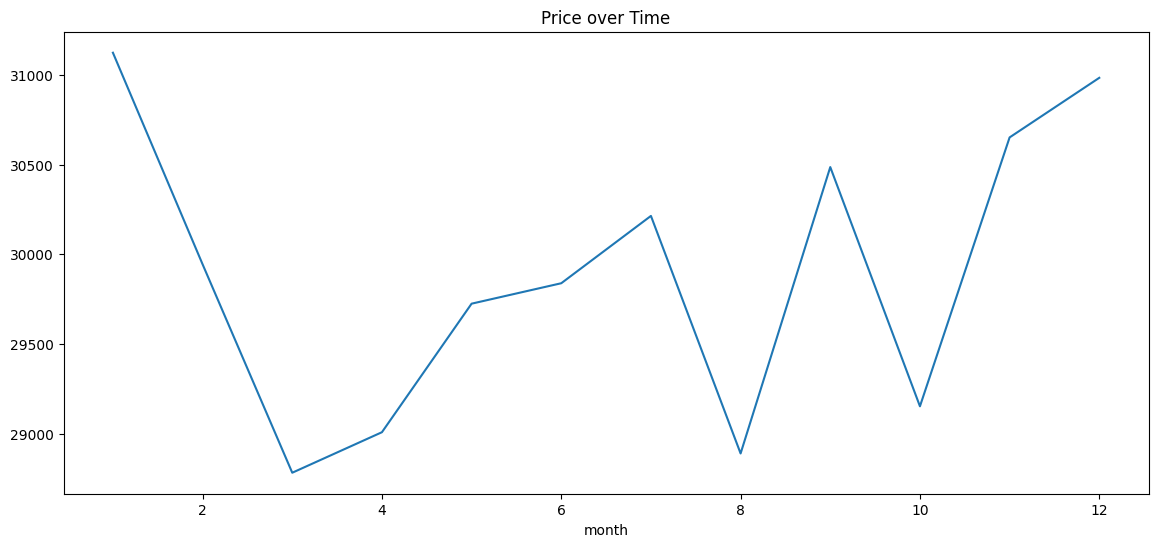

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize = (14,6))
df.groupby('month')['charter_price_($/day)'].mean().plot()
plt.title('Price over Time')

plt.show()

In [ ]:
df['vessel_type'].unique()

array(['LNG Carrier', 'LPG Carrier', 'Tanker', 'Bulk Carrier',
       'Container Ship'], dtype=object)

### Capacity and Dimensions (length(m)) Analysis

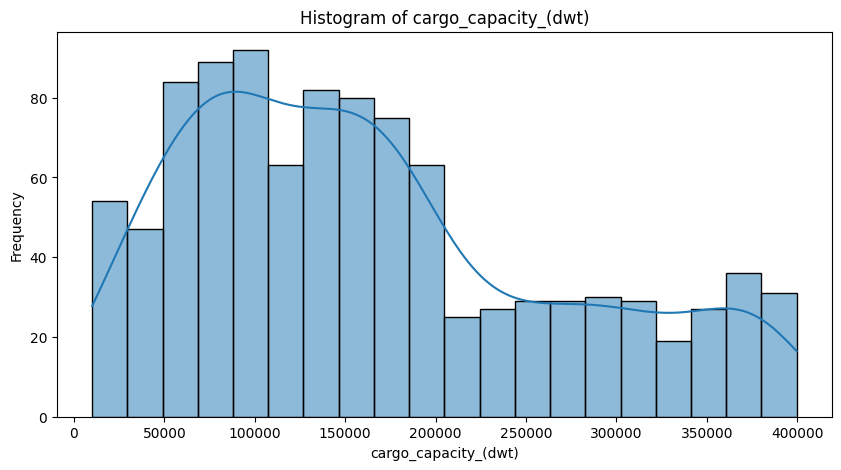

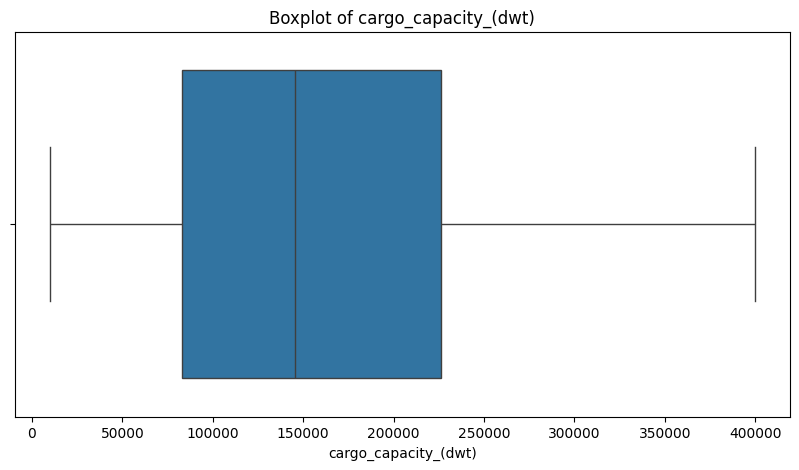

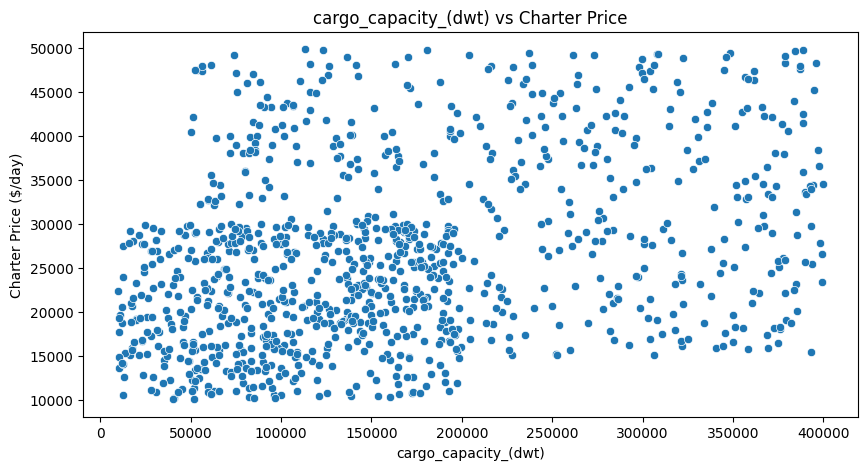

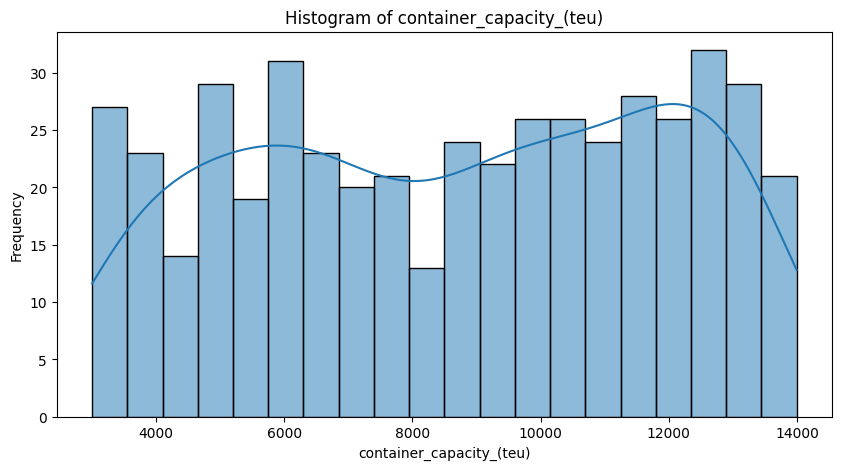

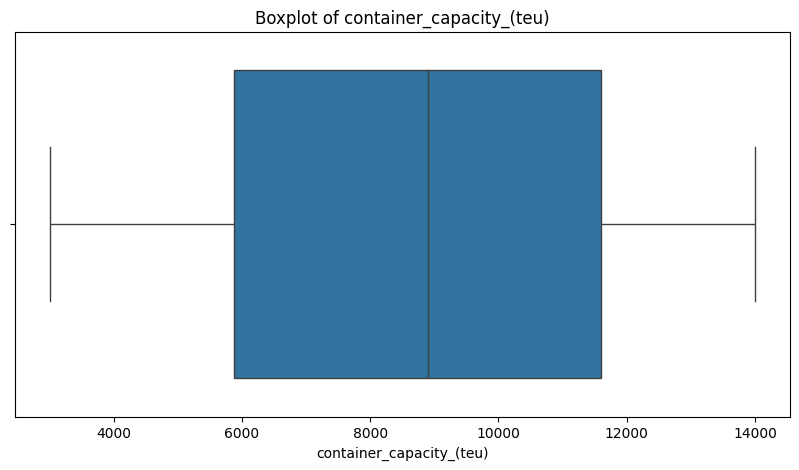

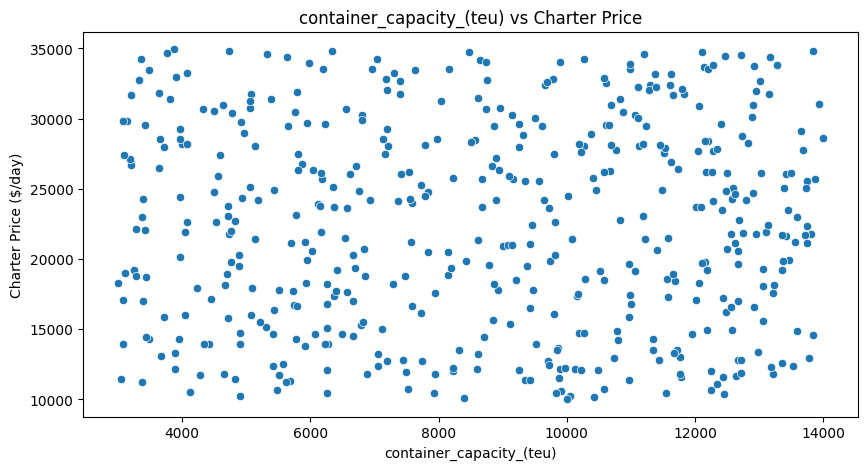

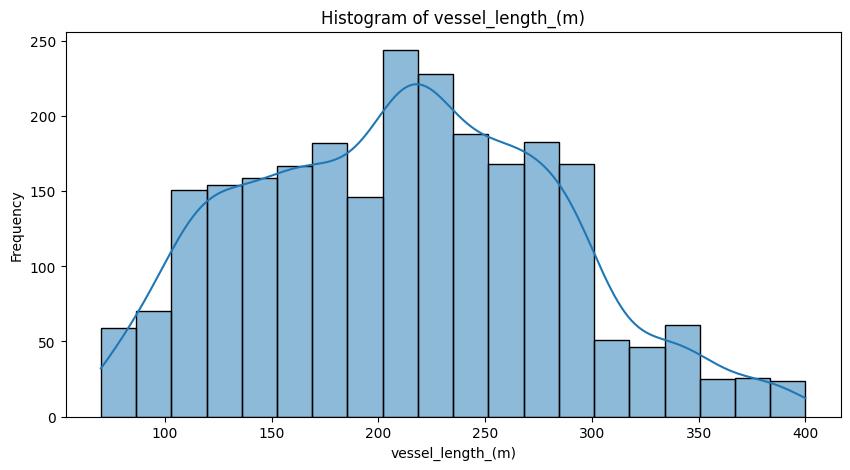

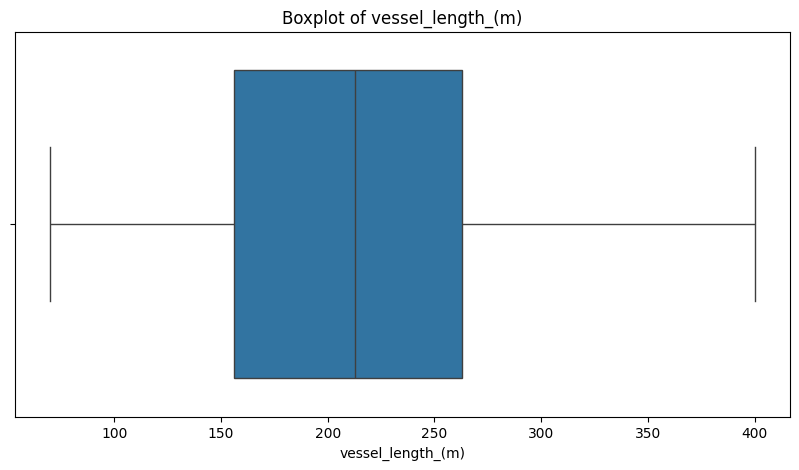

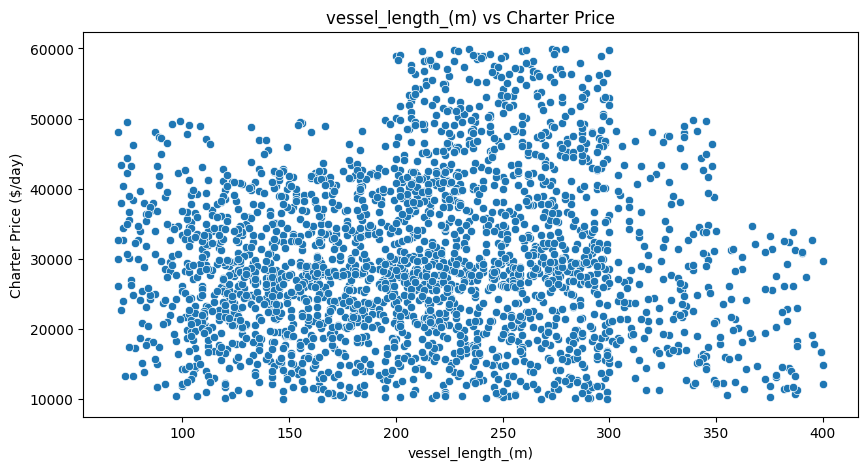

In [ ]:
# Histograms and Boxplots for cargo capacity, container capacity, vessel length, and vessel breadth
numerical_cols_1 = ['cargo_capacity_(dwt)', 'container_capacity_(teu)', 'vessel_length_(m)']
for col in numerical_cols_1:

    filtered =  df[df[col] > 0]

    plt.figure(figsize=(10, 5))
    sns.histplot(filtered[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=filtered[col], showfliers = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter Plots for relationships with charter price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=filtered, x=col, y='charter_price_($/day)')
    plt.title(f'{col} vs Charter Price')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()


In [ ]:
# Column names being observed 
numerical_cols_1 = ['cargo_capacity_(dwt)', 'container_capacity_(teu)', 'vessel_length_(m)']
numerical_cols_2 = ['charter_price_($/day)', 'duration_(days)', 'fuel_cost_($/liter)']
numerical_cols_3 = ['lng_capacity_(m)', 'lpg_capacity_(m)']

### Charter Price, Duration, Fuel Cost Analysis

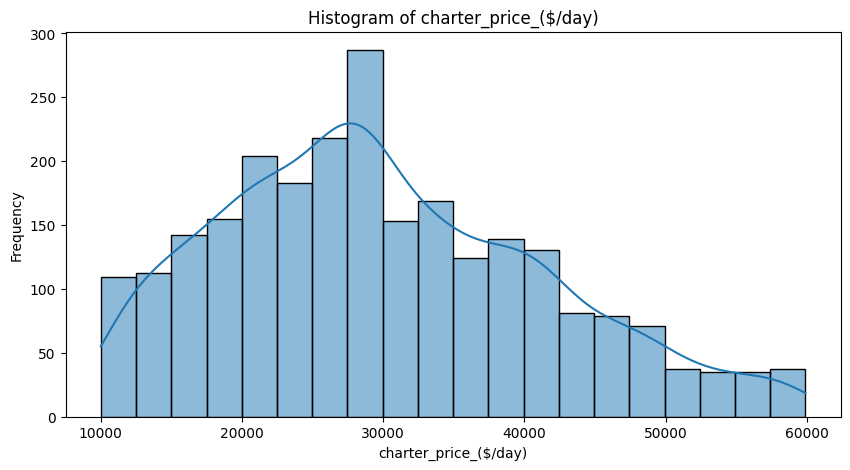

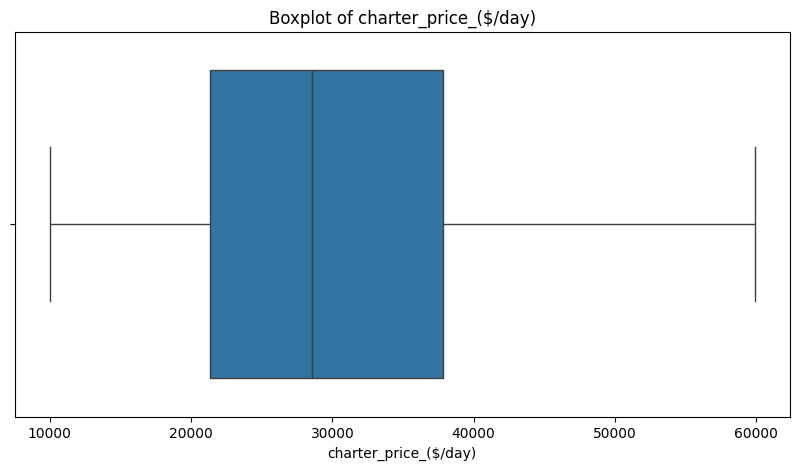

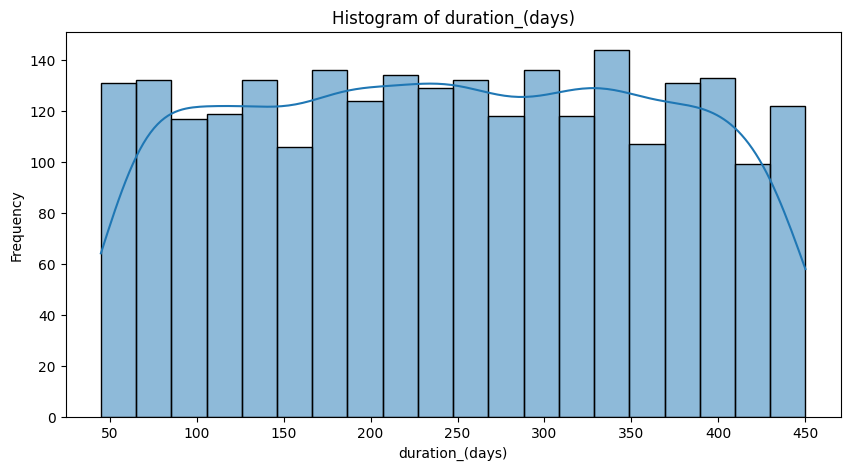

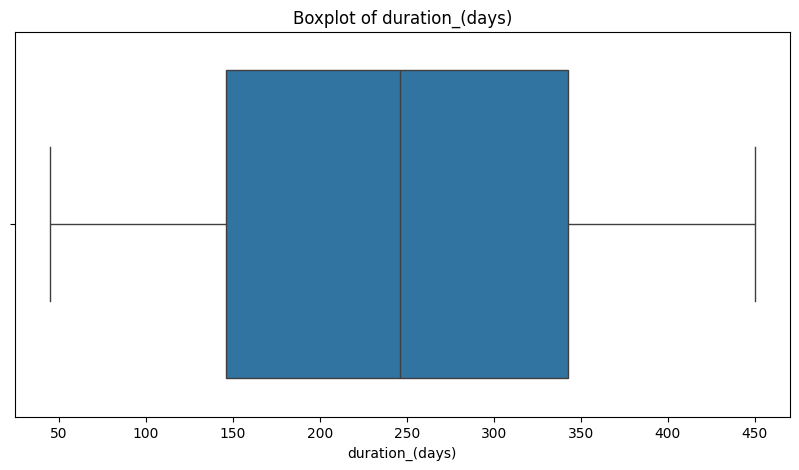

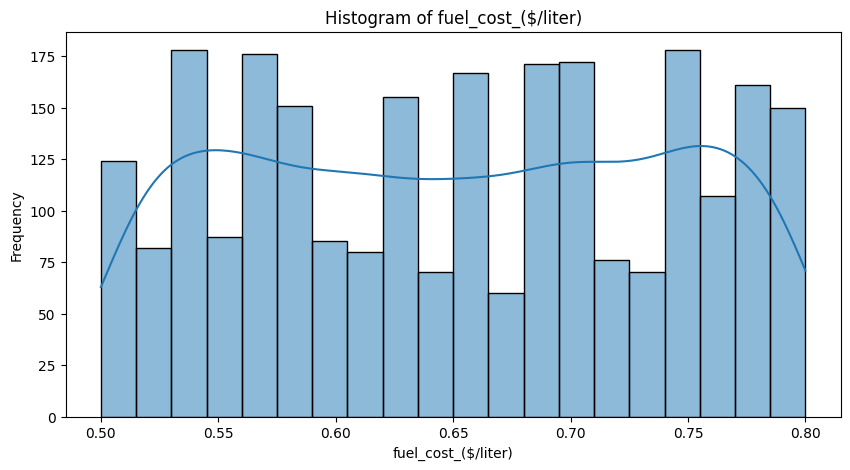

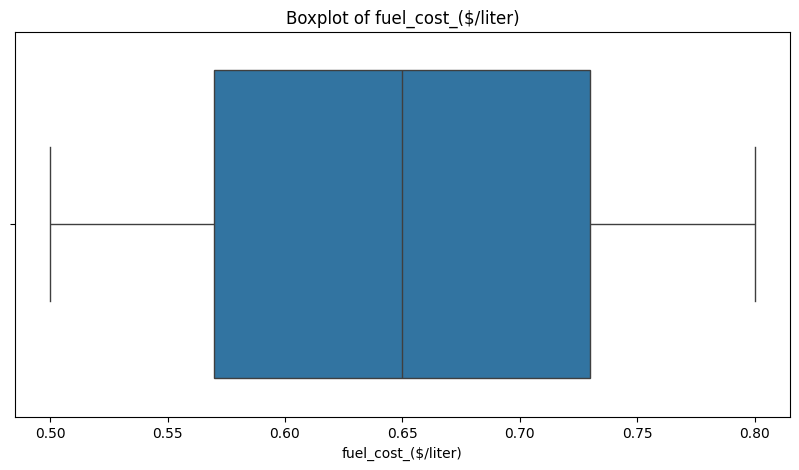

In [ ]:
# Histograms and Boxplots for charter price, duration, and fuel cost
numerical_cols_2 = ['charter_price_($/day)', 'duration_(days)', 'fuel_cost_($/liter)']
for col in numerical_cols_2:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], showfliers = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# # Correlation Analysis
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


### LNG & LPG Capacity Analysis 

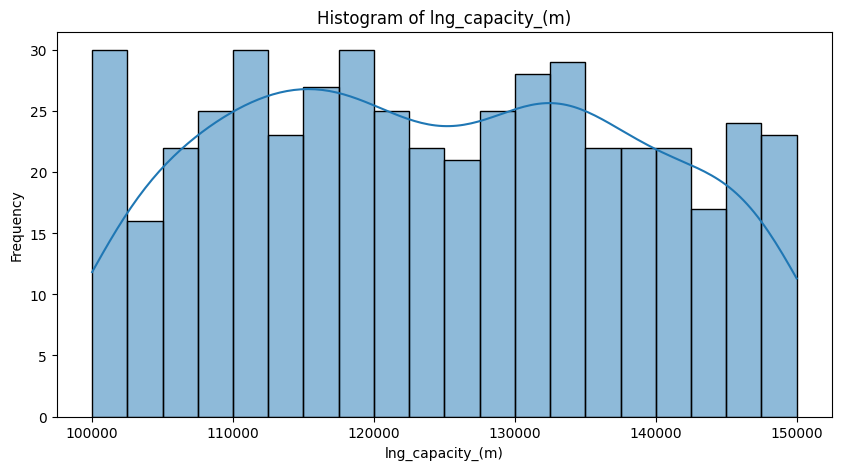

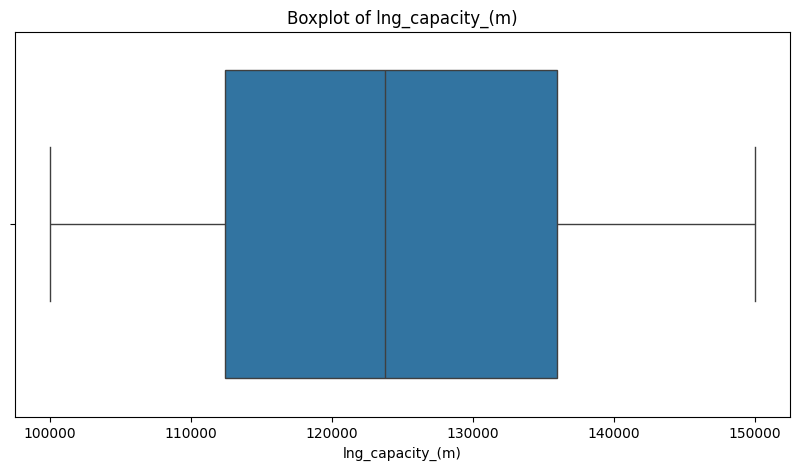

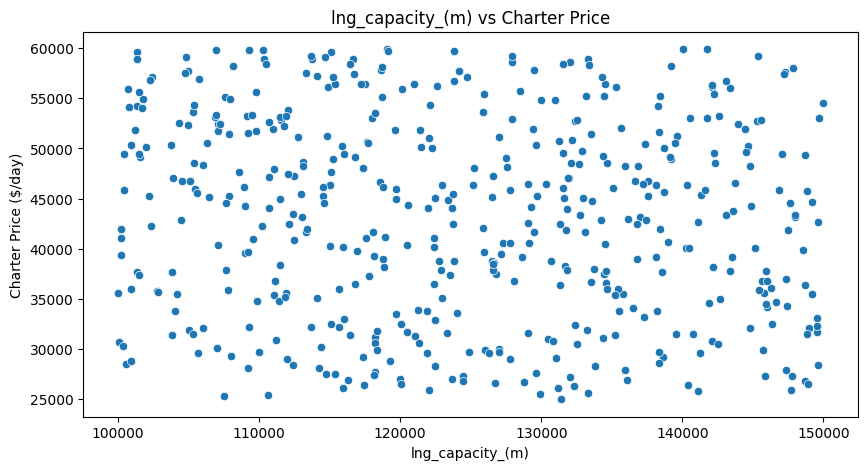

In [ ]:
# Histograms and Boxplots for LNG and LPG capacity
numerical_cols_3 = ['lng_capacity_(m)']

lng_df  = df[df['lng_capacity_(m)'] > 0]


for col in numerical_cols_3:

    plt.figure(figsize=(10, 5))
    sns.histplot(lng_df['lng_capacity_(m)'], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=lng_df['lng_capacity_(m)'], showfliers = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter Plots for relationships with charter price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=lng_df, x=lng_df['lng_capacity_(m)'], y='charter_price_($/day)')
    plt.title(f'{col} vs Charter Price')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()


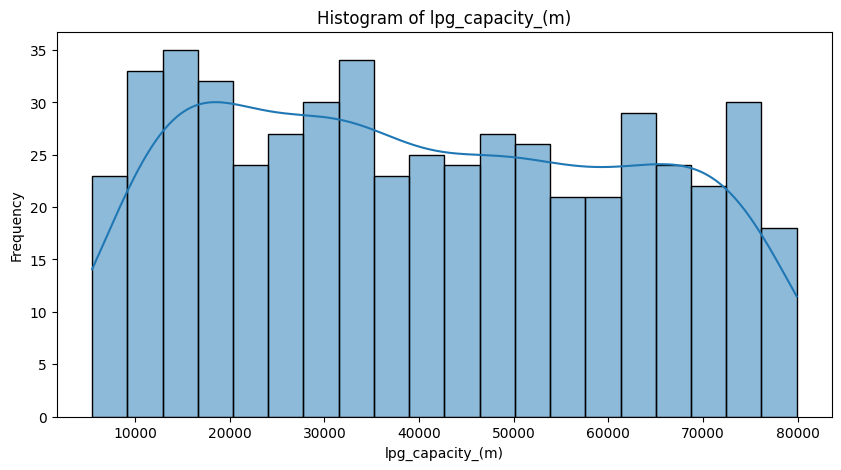

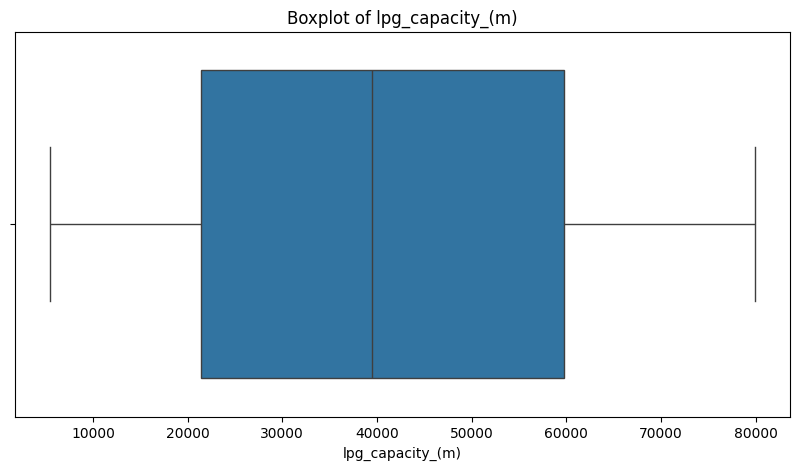

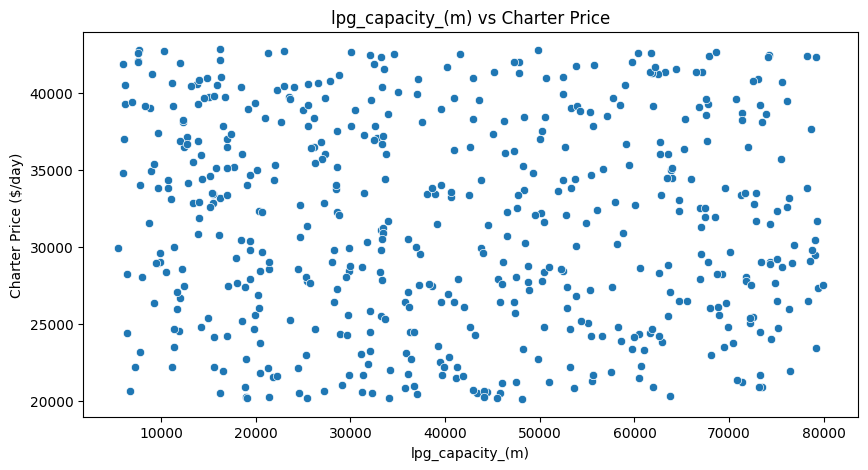

In [ ]:
numerical_cols_4 = ['lpg_capacity_(m)']

lpg_df = df[df['lpg_capacity_(m)'] > 0] 

for col in numerical_cols_4:
 
    plt.figure(figsize=(10, 5))
    sns.histplot(lpg_df['lpg_capacity_(m)'], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=lpg_df['lpg_capacity_(m)'], showfliers = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter Plots for relationships with charter price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=lpg_df, x=lpg_df['lpg_capacity_(m)'], y='charter_price_($/day)')
    plt.title(f'{col} vs Charter Price')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()


### Size Category and Cargo Type Analysis

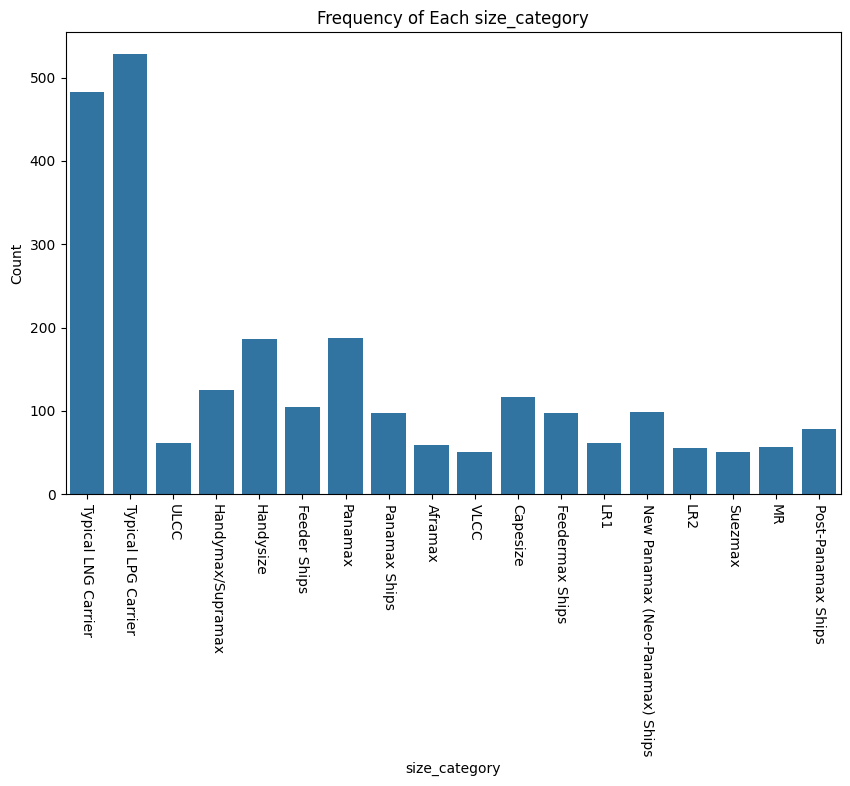

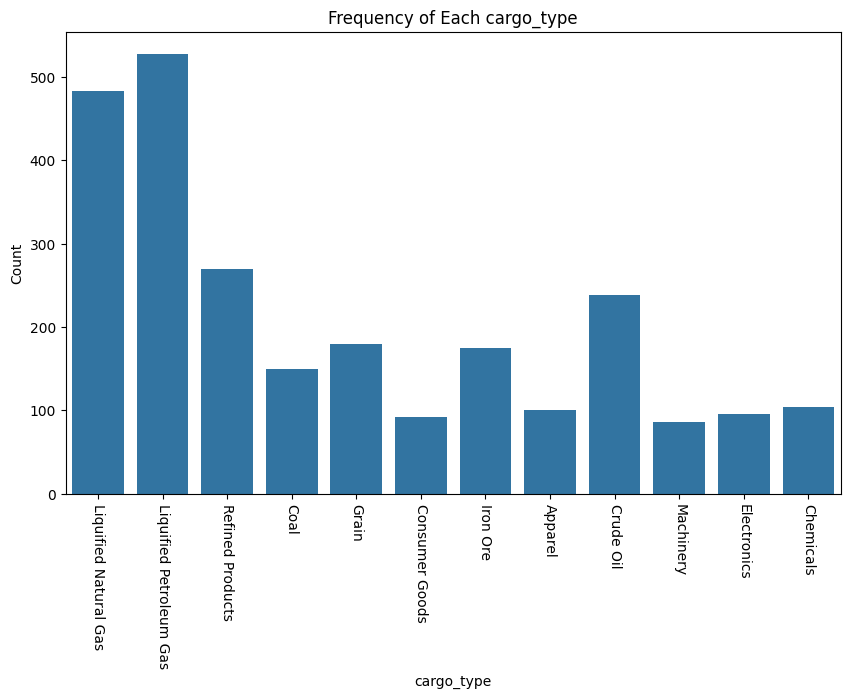

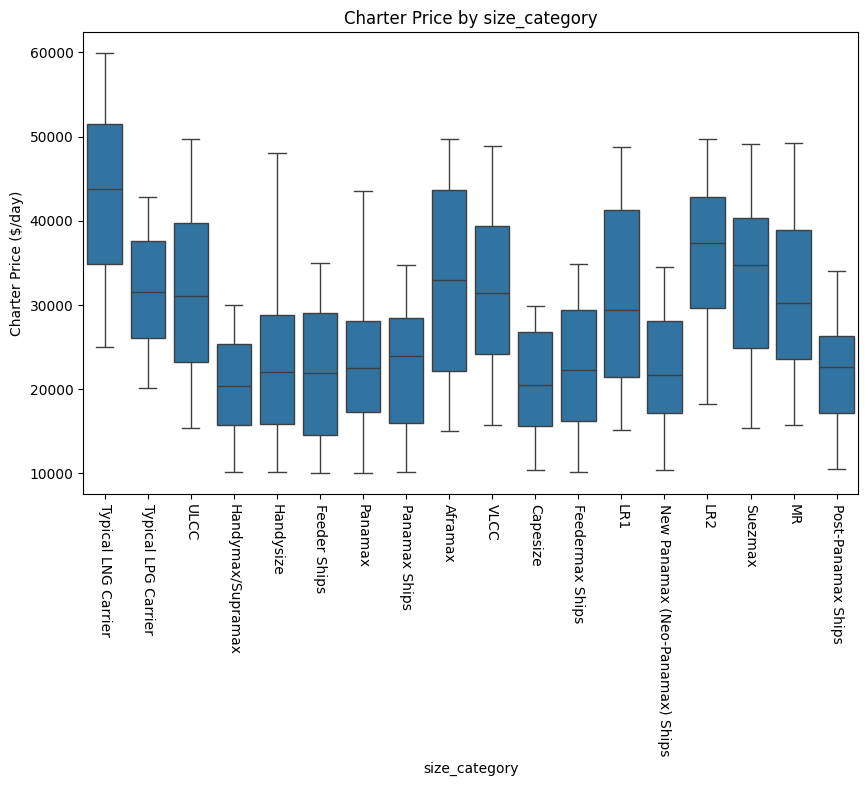

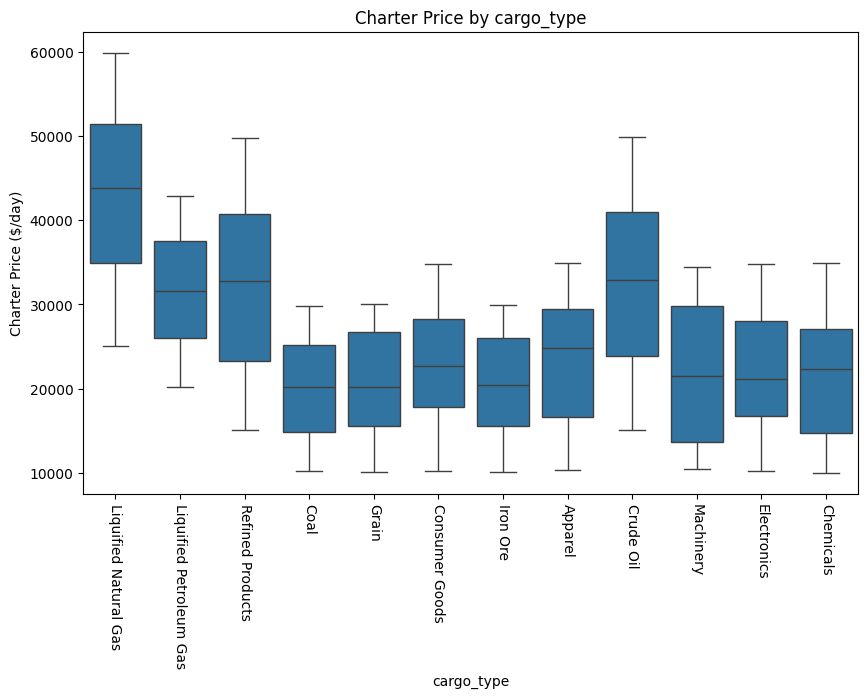

In [ ]:
# Count Plots for size category and cargo type
categorical_cols = ['size_category', 'cargo_type']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of Each {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 270)
    plt.show()

# Comparison: Charter price by size category and cargo type
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='charter_price_($/day)', showfliers = False)
    plt.title(f'Charter Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.xticks(rotation = 270)
    plt.show()
